# Ojei Victory 202137995
# Component Two

In [2]:
!pip install opencv-python

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 991.0 kB/s eta 0:00:40
   - -------------------------------------- 1.3/38.8 MB 16.3 MB/s eta 0:00:03
   --- ------------------------------------ 3.7/38.8 MB 29.2 MB/s eta 0:00:02
   ------- -------------------------------- 7.0/38.8 MB 40.4 MB/s eta 0:00:01
   ---------- ----------------------------- 9.9/38.8 MB 44.9 MB/s eta 0:00:01
   ------------- -------------------------- 13.4/38.8 MB 72.6 MB/s eta 0:00:01
   ---------------- ----------------------- 15.6/38.8 MB 65.6 MB/s eta 0:00:01
   -------------------- ------------------- 19.5/38.8 MB 73.1 MB/s eta 0:00:01
   ----------------------- ---------------- 22.4/38.8 MB 65.6 MB/s eta 0:00:01
   ------------------------- -------------- 24.7/38.8 MB 65.6 MB/s eta 0:00:01
   ---------------------------- ----------- 28.0/38.8 MB 65.6 MB/s eta 0:00:01
   --------------------------------- ------ 32.1/38.8 MB 72.6 MB/


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report

In [2]:
#Define Directory
train_dir = "train"
test_dir = "test"

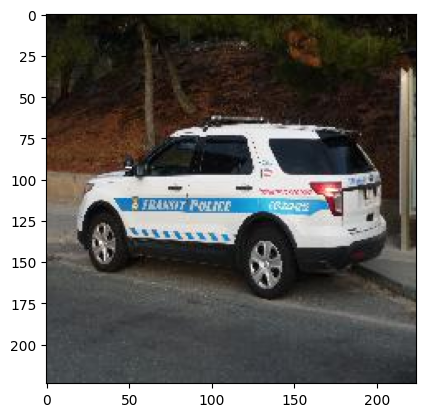

In [3]:
# Reading some images
image = cv2.imread(r"train\1.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) # converting to RGB
plt.imshow(image)

In [4]:
image.shape # This shows the shape of the image (length, width,chanel)

(224, 224, 3)

## Preprocessing

In [5]:
# Here we are applying our desired transformations
image_gen = ImageDataGenerator(
            rotation_range=20,# specifies the rotation to be 20%
            width_shift_range=0.1, # specifies the width shift of 10%
            height_shift_range=0.1,# specifies the height shift of 10%
            shear_range=0.20, # crops part of the image
            zoom_range=0.20, # zooms the image by 20%
            fill_mode='nearest', # fills using the nearest pixel
            horizontal_flip=True, # Specifies the horizontal flip
            rescale=1./255 # scales the image
)

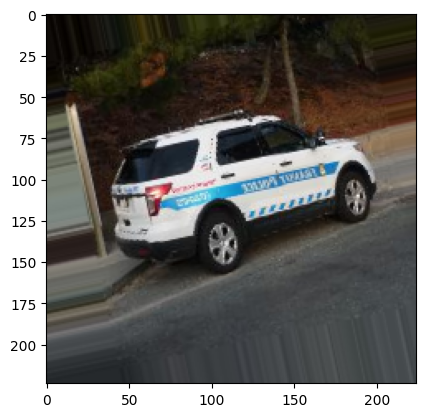

In [6]:
# showing the transformation
plt.imshow(image_gen.random_transform(image))

In [7]:
# Load the train and test dataset
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

test_df

,image_names
0,1960.jpg
1,668.jpg
2,2082.jpg
3,808.jpg
4,1907.jpg
...,...
701,674.jpg
702,1027.jpg
703,447.jpg
704,2176.jpg


In [8]:
train_df

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0
...,...,...
1641,1638.jpg,0
1642,1095.jpg,0
1643,1130.jpg,0
1644,1294.jpg,0


In [9]:
# Check if 'emergency_or_not' column exists before converting its values to string type
if 'emergency_or_not' in train_df.columns:
    train_df['emergency_or_not'] = train_df['emergency_or_not'].astype(str)

if 'emergency_or_not' in test_df.columns:
    test_df['emergency_or_not'] = test_df['emergency_or_not'].astype(str)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646 entries, 0 to 1645
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   image_names       1646 non-null   object
 1   emergency_or_not  1646 non-null   object
dtypes: object(2)
memory usage: 25.8+ KB


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   image_names  706 non-null    object
dtypes: object(1)
memory usage: 5.6+ KB


In [11]:
train_generator=image_gen.flow_from_dataframe(dataframe=train_df[:1150], # specify the dataset used for training
 directory=train_dir, 
 x_col='image_names', 
 y_col='emergency_or_not', 
 class_mode='binary', # specifies the kind of classification
 target_size=(224,224), # specifies the dimension to resize the image
 batch_size=32 # defines the batch size
 )
validation_generator=image_gen.flow_from_dataframe(dataframe=train_df[1150:], # specify the dataset used for training
 directory=train_dir,
 x_col='image_names', 
 y_col='emergency_or_not', 
 class_mode='binary', 
 target_size=(224,224), 
 batch_size=32 
 ) 

Found 1150 validated image filenames belonging to 2 classes.
Found 496 validated image filenames belonging to 2 classes.


## Build CNN Model

In [12]:
# Initializing the Sequential model
model = Sequential()

# Adding the first convolutional and pooling layers
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(224, 224, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding the second convolutional and pooling layers
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding the third convolutional and pooling layers
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding the Flatten layer to convert 3D output to 1D
model.add(Flatten())

# Adding a dense layer with 64 neurons and a dropout rate of 50%
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Single neuron with sigmoid for binary classification
model.add(Dense(1, activation='sigmoid'))  

# Printing the model summary
model.summary()

C:\Users\Ojei Victory\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       5,537,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,631,169 (21.48 MB)

 Trainable params: 5,631,169 (21.48 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
from tensorflow.keras.optimizers import SGD
# Compile the model with SGD optimizer, binary crossentropy loss, and accuracy metric
model.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model for 20 epochs with data augmentation when batch size initialised under train_generator is 32 
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

Epoch 1/20


C:\Users\Ojei Victory\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


36/36 ━━━━━━━━━━━━━━━━━━━━ 33s 785ms/step - accuracy: 0.5973 - loss: 0.6832 - val_accuracy: 0.6089 - val_loss: 0.6665
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 32s 819ms/step - accuracy: 0.6243 - loss: 0.6686 - val_accuracy: 0.7177 - val_loss: 0.6434
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 34s 864ms/step - accuracy: 0.6912 - loss: 0.6253 - val_accuracy: 0.7359 - val_loss: 0.5716
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 32s 829ms/step - accuracy: 0.7066 - loss: 0.5878 - val_accuracy: 0.7621 - val_loss: 0.4961
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 33s 838ms/step - accuracy: 0.6957 - loss: 0.5724 - val_accuracy: 0.7641 - val_loss: 0.4993
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 37s 942ms/step - accuracy: 0.7492 - loss: 0.5753 - val_accuracy: 0.7641 - val_loss: 0.5134
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 36s 931ms/step - accuracy: 0.7342 - loss: 0.5631 - val_accuracy: 0.7581 - val_loss: 0.5116
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 36s 913ms/step - accuracy: 0.7357 - loss: 0.5249 - val_accuracy: 0.774

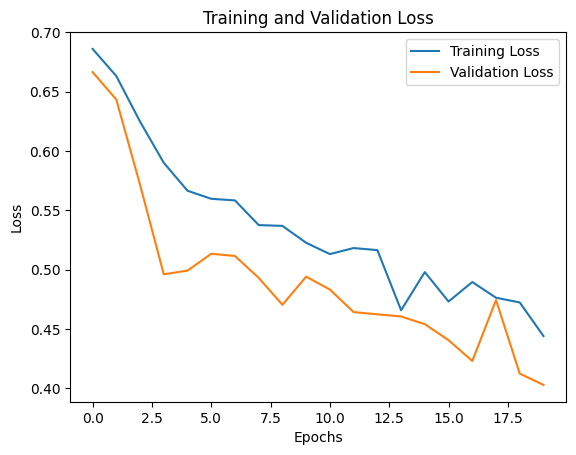

In [14]:
# Convert history to a DataFrame for easy analysis
history_df = pd.DataFrame(history.history)

# Plot training and validation loss
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

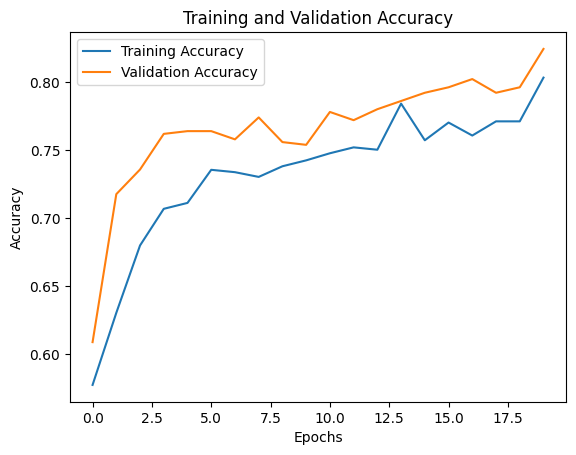

In [15]:
# Plot training and validation accuracy
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Regularisation and Hyper-parameter Tuning

In [16]:
train_generator=image_gen.flow_from_dataframe(dataframe=train_df[:1150], # specify the dataset used for training
 directory=train_dir, 
 x_col='image_names', 
 y_col='emergency_or_not', 
 class_mode='binary', # specifies the kind of classification
 target_size=(224,224), # specifies the dimension to resize the image
 batch_size=128 # defines the batch size
 )
validation_generator=image_gen.flow_from_dataframe(dataframe=train_df[1150:], # specify the dataset used for training
 directory=train_dir,
 x_col='image_names', 
 y_col='emergency_or_not', 
 class_mode='binary', 
 target_size=(224,224), 
 batch_size=128 
 ) 

Found 1150 validated image filenames belonging to 2 classes.
Found 496 validated image filenames belonging to 2 classes.


In [17]:
# Compile the model with SGD optimizer, binary crossentropy loss, and accuracy metric
model.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model for 20 epochs with data augmentation when batch size initialised under train_generator is 128 
history_batch_128 = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

Epoch 1/20


C:\Users\Ojei Victory\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.7876 - loss: 0.4380 - val_accuracy: 0.8145 - val_loss: 0.4050
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.7987 - loss: 0.4211 - val_accuracy: 0.8327 - val_loss: 0.3787
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.7871 - loss: 0.4376 - val_accuracy: 0.8266 - val_loss: 0.3809
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 48s 4s/step - accuracy: 0.8098 - loss: 0.4120 - val_accuracy: 0.8105 - val_loss: 0.3892
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 48s 4s/step - accuracy: 0.8135 - loss: 0.4117 - val_accuracy: 0.8246 - val_loss: 0.3887
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 44s 4s/step - accuracy: 0.8292 - loss: 0.3853 - val_accuracy: 0.8165 - val_loss: 0.3845
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 44s 4s/step - accuracy: 0.8071 - loss: 0.4131 - val_accuracy: 0.8185 - val_loss: 0.4052
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.8014 - loss: 0.4166 - val_accuracy: 0.8306 - val_loss: 0.3788
Epoch 9/20
9/9 ━━━━

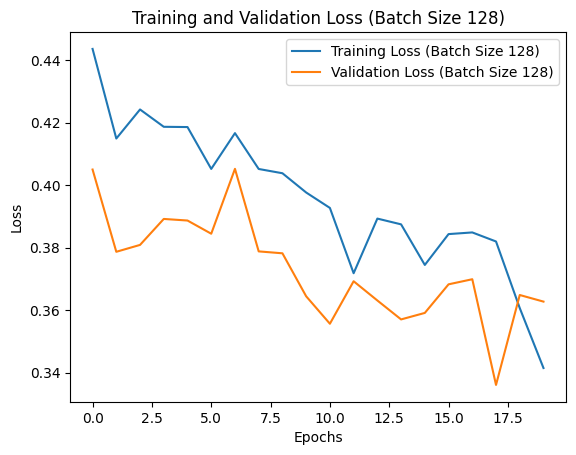

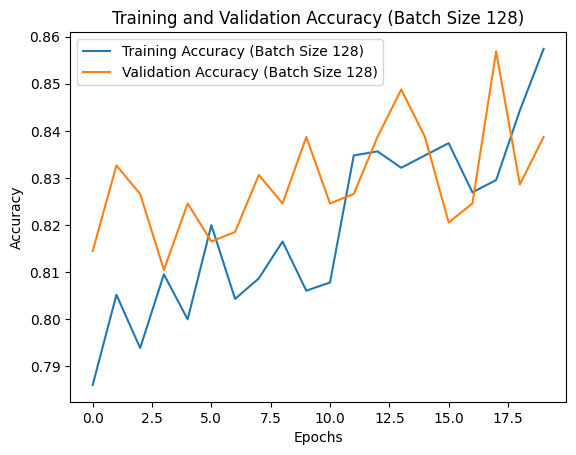

In [18]:
# Convert the new training history to a DataFrame
history_df_batch_128 = pd.DataFrame(history_batch_128.history)

# Plot training and validation loss for the new batch size
plt.plot(history_df_batch_128['loss'], label='Training Loss (Batch Size 128)')
plt.plot(history_df_batch_128['val_loss'], label='Validation Loss (Batch Size 128)')
plt.title('Training and Validation Loss (Batch Size 128)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy for the new batch size
plt.plot(history_df_batch_128['accuracy'], label='Training Accuracy (Batch Size 128)')
plt.plot(history_df_batch_128['val_accuracy'], label='Validation Accuracy (Batch Size 128)')
plt.title('Training and Validation Accuracy (Batch Size 128)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Rebuilding the CNN model with a stride length of 2 and padding

In [19]:
train_generator=image_gen.flow_from_dataframe(dataframe=train_df[:1150], # specify the dataset used for training
 directory=train_dir, 
 x_col='image_names', 
 y_col='emergency_or_not', 
 class_mode='binary', # specifies the kind of classification
 target_size=(224,224), # specifies the dimension to resize the image
 batch_size=32 # defines the batch size
 )
validation_generator=image_gen.flow_from_dataframe(dataframe=train_df[1150:], # specify the dataset used for training
 directory=train_dir,
 x_col='image_names', 
 y_col='emergency_or_not', 
 class_mode='binary', 
 target_size=(224,224), 
 batch_size=32 
 ) 

Found 1150 validated image filenames belonging to 2 classes.
Found 496 validated image filenames belonging to 2 classes.


In [21]:
# Rebuilding the CNN model with a stride length of 2 and padding
model_stride = Sequential()

# Adding the first convolutional and pooling layers with stride of 2 and padding
model_stride.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(2, 2), padding="same", activation='relu', input_shape=(224, 224, 3)))
model_stride.add(MaxPooling2D(pool_size=(2, 2), padding="same"))

# Adding the second convolutional and pooling layers with stride of 2 and padding
model_stride.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(2, 2), padding="same", activation='relu'))
model_stride.add(MaxPooling2D(pool_size=(2, 2), padding="same"))

# Adding the third convolutional and pooling layers with stride of 2 and padding
model_stride.add(Conv2D(filters=128, kernel_size=(3, 3), strides=(2, 2), padding="same", activation='relu'))
model_stride.add(MaxPooling2D(pool_size=(2, 2), padding="same"))

# Adding the Flatten layer to convert 3D outputs into 1D
model_stride.add(Flatten())

# Adding a dense layer with 64 neurons and dropout
model_stride.add(Dense(64, activation='relu'))
model_stride.add(Dropout(0.5))

# Single neuron with sigmoid for binary classification
model_stride.add(Dense(1, activation='sigmoid'))  

# Printing the model summary
model_stride.summary()

C:\Users\Ojei Victory\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 112, 112, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 224,449 (876.75 KB)

 Trainable params: 224,449 (876.75 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
from tensorflow.keras.optimizers import SGD
# Compile the model with SGD optimizer, binary crossentropy loss, and accuracy metric
model_stride.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model for 20 epochs with data augmentation when batch size initialised under train_generator is 32 
history_stride = model_stride.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

Epoch 1/20


C:\Users\Ojei Victory\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


36/36 ━━━━━━━━━━━━━━━━━━━━ 25s 585ms/step - accuracy: 0.5634 - loss: 0.6842 - val_accuracy: 0.6069 - val_loss: 0.6720
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 21s 515ms/step - accuracy: 0.5566 - loss: 0.6850 - val_accuracy: 0.6069 - val_loss: 0.6676
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 21s 506ms/step - accuracy: 0.5716 - loss: 0.6843 - val_accuracy: 0.6069 - val_loss: 0.6638
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 22s 532ms/step - accuracy: 0.6113 - loss: 0.6639 - val_accuracy: 0.6129 - val_loss: 0.6657
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 21s 513ms/step - accuracy: 0.6150 - loss: 0.6678 - val_accuracy: 0.6976 - val_loss: 0.6397
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 21s 507ms/step - accuracy: 0.6689 - loss: 0.6361 - val_accuracy: 0.7258 - val_loss: 0.5983
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 452ms/step - accuracy: 0.6709 - loss: 0.6258 - val_accuracy: 0.7379 - val_loss: 0.5767
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 20s 475ms/step - accuracy: 0.6983 - loss: 0.6085 - val_accuracy: 0.731

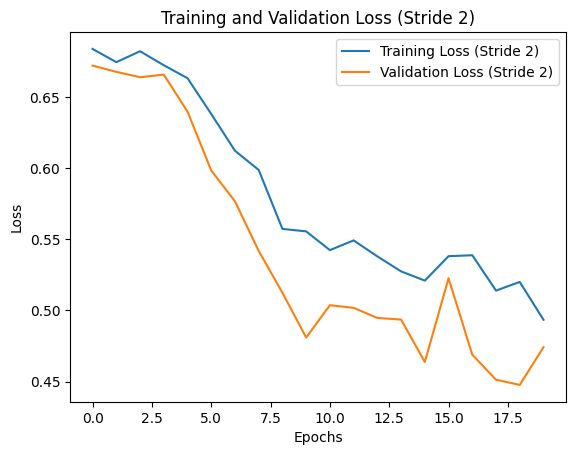

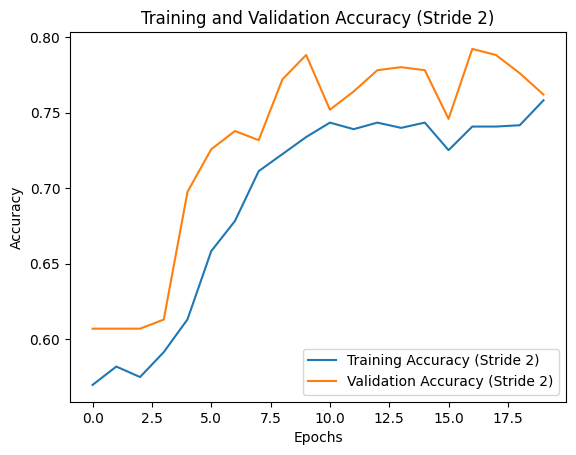

In [23]:
# Convert the history to a DataFrame
history_df_stride = pd.DataFrame(history_stride.history)

# Plot training and validation loss
plt.plot(history_df_stride['loss'], label='Training Loss (Stride 2)')
plt.plot(history_df_stride['val_loss'], label='Validation Loss (Stride 2)')
plt.title('Training and Validation Loss (Stride 2)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history_df_stride['accuracy'], label='Training Accuracy (Stride 2)')
plt.plot(history_df_stride['val_accuracy'], label='Validation Accuracy (Stride 2)')
plt.title('Training and Validation Accuracy (Stride 2)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Rebuilding the CNN model with kernel size 5x5

In [24]:
model_kernel = Sequential()

# Adding the first convolutional and pooling layers with kernel size 5x5
model_kernel.add(Conv2D(filters=32, kernel_size=(5, 5), input_shape=(224, 224, 3), activation='relu', padding="same"))
model_kernel.add(MaxPooling2D(pool_size=(2, 2), padding="same"))

# Adding the second convolutional and pooling layers with kernel size 5x5
model_kernel.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu', padding="same"))
model_kernel.add(MaxPooling2D(pool_size=(2, 2), padding="same"))

# Adding the third convolutional and pooling layers with kernel size 5x5
model_kernel.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu', padding="same"))
model_kernel.add(MaxPooling2D(pool_size=(2, 2), padding="same"))

# Adding the Flatten layer to convert 3D outputs into 1D
model_kernel.add(Flatten())

# Adding a dense layer with 64 neurons and dropout
model_kernel.add(Dense(64, activation='relu'))
model_kernel.add(Dropout(0.5))

# Single neuron with sigmoid for binary classification
model_kernel.add(Dense(1, activation='sigmoid')) 

# Print the model summary
model_kernel.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 224, 224, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 112, 112, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 56, 56, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │       6,422,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,681,281 (25.49 MB)

 Trainable params: 6,681,281 (25.49 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Compile the model with SGD optimizer, binary crossentropy loss, and accuracy metric
model_kernel.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model for 20 epochs with data augmentation when batch size initialised under train_generator is 32 
history_kernel = model_kernel.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.5881 - loss: 0.6900 - val_accuracy: 0.6069 - val_loss: 0.6674
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.5789 - loss: 0.6794 - val_accuracy: 0.6089 - val_loss: 0.6459
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.6271 - loss: 0.6577 - val_accuracy: 0.6633 - val_loss: 0.6064
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.6244 - loss: 0.6454 - val_accuracy: 0.6673 - val_loss: 0.6082
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.6335 - loss: 0.6486 - val_accuracy: 0.6573 - val_loss: 0.5990
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.6978 - loss: 0.6201 - val_accuracy: 0.7480 - val_loss: 0.5562
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.7115 - loss: 0.5925 - val_accuracy: 0.7278 - val_loss: 0.5719
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.7235 - loss: 0.5849 - val_accuracy: 0.7278 - val_loss:

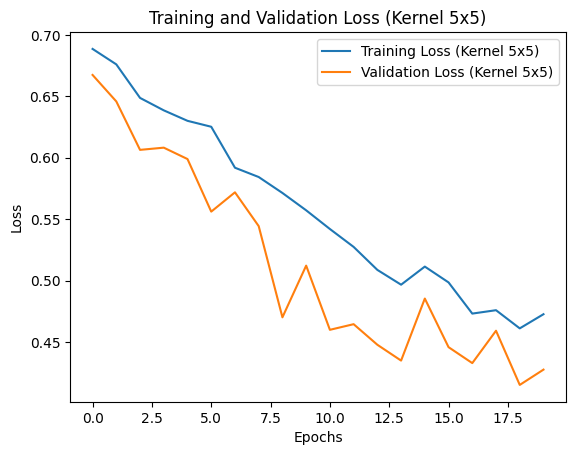

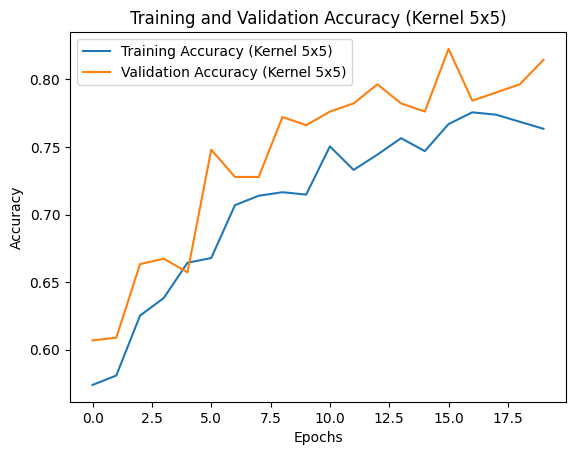

In [27]:
# Convert the history to a DataFrame
history_df_kernel = pd.DataFrame(history_kernel.history)

# Plot training and validation loss
plt.plot(history_df_kernel['loss'], label='Training Loss (Kernel 5x5)')
plt.plot(history_df_kernel['val_loss'], label='Validation Loss (Kernel 5x5)')
plt.title('Training and Validation Loss (Kernel 5x5)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history_df_kernel['accuracy'], label='Training Accuracy (Kernel 5x5)')
plt.plot(history_df_kernel['val_accuracy'], label='Validation Accuracy (Kernel 5x5)')
plt.title('Training and Validation Accuracy (Kernel 5x5)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Rebuilding the CNN model with Average Pooling

In [28]:
# Importing the AveragePooling2D layer
from tensorflow.keras.layers import AveragePooling2D

# Rebuilding the CNN model with Average Pooling
model_avg_pool = Sequential()

# Adding the first convolutional and average pooling layers
model_avg_pool.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(224, 224, 3), activation='relu', padding="same"))
model_avg_pool.add(AveragePooling2D(pool_size=(2, 2), padding="same"))

# Adding the second convolutional and average pooling layers
model_avg_pool.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding="same"))
model_avg_pool.add(AveragePooling2D(pool_size=(2, 2), padding="same"))

# Adding the third convolutional and average pooling layers
model_avg_pool.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding="same"))
model_avg_pool.add(AveragePooling2D(pool_size=(2, 2), padding="same"))

# Adding the Flatten layer to convert 3D outputs into 1D
model_avg_pool.add(Flatten())

# Adding a dense layer with 64 neurons and dropout
model_avg_pool.add(Dense(64, activation='relu'))
model_avg_pool.add(Dropout(0.5))

# Single neuron with sigmoid for binary classification
model_avg_pool.add(Dense(1, activation='sigmoid')) 

# Print the model summary
model_avg_pool.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 56, 56, 64)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_2                  │ (None, 28, 28, 128)         │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │       6,422,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,515,905 (24.86 MB)

 Trainable params: 6,515,905 (24.86 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Compile the model
model_avg_pool.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
# Train the model with Average Pooling
history_avg_pool = model_avg_pool.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 37s 936ms/step - accuracy: 0.5779 - loss: 0.6835 - val_accuracy: 0.6492 - val_loss: 0.6481
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.6247 - loss: 0.6568 - val_accuracy: 0.6431 - val_loss: 0.6256
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.6294 - loss: 0.6593 - val_accuracy: 0.6210 - val_loss: 0.6446
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.6199 - loss: 0.6655 - val_accuracy: 0.6391 - val_loss: 0.6333
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.6224 - loss: 0.6508 - val_accuracy: 0.6492 - val_loss: 0.6336
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.6298 - loss: 0.6279 - val_accuracy: 0.6573 - val_loss: 0.6184
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.6505 - loss: 0.6258 - val_accuracy: 0.6673 - val_loss: 0.6135
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.6657 - loss: 0.6346 - val_accuracy: 0.6613 - val_lo

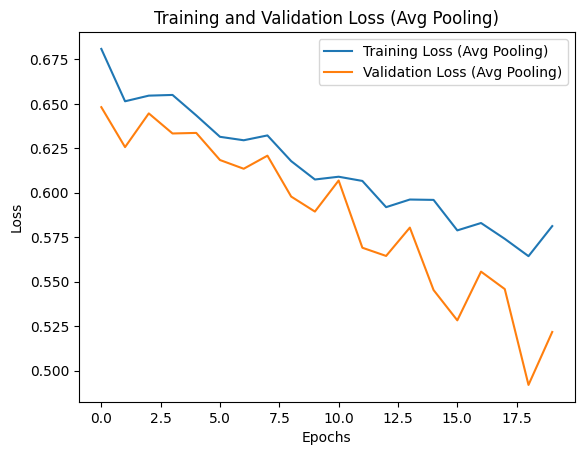

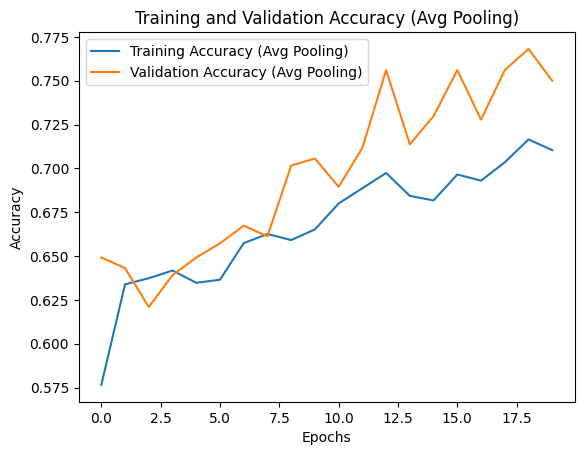

In [30]:
# Convert the history to a DataFrame
history_df_avg_pool = pd.DataFrame(history_avg_pool.history)

# Plot training and validation loss
plt.plot(history_df_avg_pool['loss'], label='Training Loss (Avg Pooling)')
plt.plot(history_df_avg_pool['val_loss'], label='Validation Loss (Avg Pooling)')
plt.title('Training and Validation Loss (Avg Pooling)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history_df_avg_pool['accuracy'], label='Training Accuracy (Avg Pooling)')
plt.plot(history_df_avg_pool['val_accuracy'], label='Validation Accuracy (Avg Pooling)')
plt.title('Training and Validation Accuracy (Avg Pooling)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Batch Normalisation for Regularisation

In [37]:
# Rebuilding the CNN model with Batch Normalization
model_batch_norm = Sequential()

# Adding the first convolutional, pooling, and batch normalization layers
model_batch_norm.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(224, 224, 3), activation='relu', padding="same"))
model_batch_norm.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
model_batch_norm.add(BatchNormalization(momentum=0.9))

# Adding the second convolutional, pooling, and batch normalization layers
model_batch_norm.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding="same"))
model_batch_norm.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
model_batch_norm.add(BatchNormalization(momentum=0.9))

# Adding the third convolutional, pooling, and batch normalization layers
model_batch_norm.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding="same"))
model_batch_norm.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
model_batch_norm.add(BatchNormalization(momentum=0.9))

# Adding the Flatten layer to convert 3D outputs into 1D
model_batch_norm.add(Flatten())

# Adding a dense layer with 64 neurons and dropout
model_batch_norm.add(Dense(64, activation='relu'))
model_batch_norm.add(Dropout(0.5))

# Single neuron with sigmoid for binary classification
model_batch_norm.add(Dense(1, activation='sigmoid')) 

# Print the model summary
model_batch_norm.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)                   │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 112, 112, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 56, 56, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │       6,422,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,516,801 (24.86 MB)

 Trainable params: 6,516,353 (24.86 MB)

 Non-trainable params: 448 (1.75 KB)

In [38]:
# Compile the model
model_batch_norm.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
# Train the model with Batch Normalisation
history_batch_norm = model_batch_norm.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.5888 - loss: 1.4094 - val_accuracy: 0.6089 - val_loss: 1.1220
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.5470 - loss: 0.7151 - val_accuracy: 0.5968 - val_loss: 0.6589
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 38s 979ms/step - accuracy: 0.5704 - loss: 0.6968 - val_accuracy: 0.6008 - val_loss: 0.6747
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.5644 - loss: 0.6809 - val_accuracy: 0.6048 - val_loss: 0.6478
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.5876 - loss: 0.6631 - val_accuracy: 0.6069 - val_loss: 0.6618
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.5915 - loss: 0.6623 - val_accuracy: 0.6069 - val_loss: 0.6721
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.5886 - loss: 0.6762 - val_accuracy: 0.6069 - val_loss: 0.6439
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.5659 - loss: 0.6893 - val_accuracy: 0.6048 - val_lo

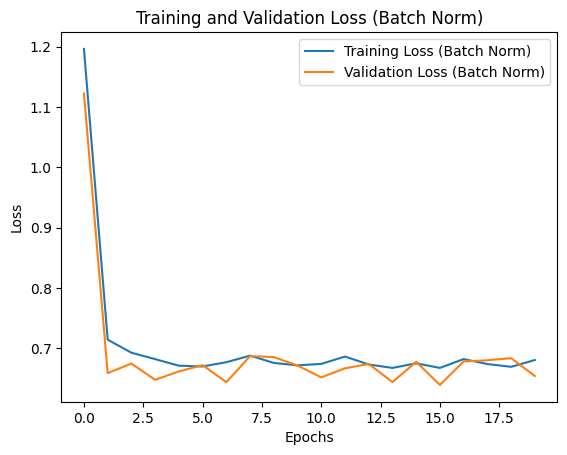

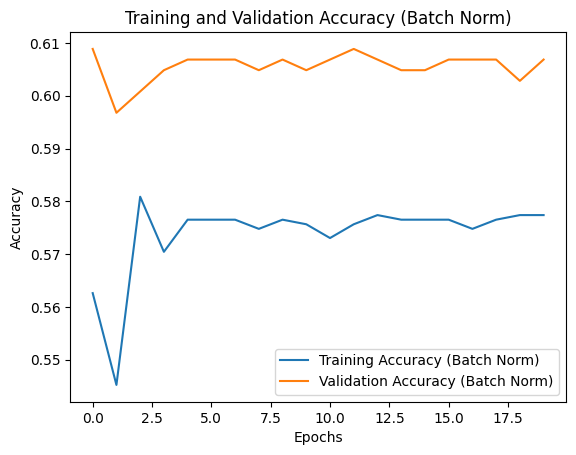

In [39]:
# Convert the history to a DataFrame
history_df_batch_norm = pd.DataFrame(history_batch_norm.history)

# Plot training and validation loss
plt.plot(history_df_batch_norm['loss'], label='Training Loss (Batch Norm)')
plt.plot(history_df_batch_norm['val_loss'], label='Validation Loss (Batch Norm)')
plt.title('Training and Validation Loss (Batch Norm)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history_df_batch_norm['accuracy'], label='Training Accuracy (Batch Norm)')
plt.plot(history_df_batch_norm['val_accuracy'], label='Validation Accuracy (Batch Norm)')
plt.title('Training and Validation Accuracy (Batch Norm)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [40]:
test_df.index

RangeIndex(start=0, stop=706, step=1)

In [42]:
!pip install tqdm

     ---------------------------------------- 0.0/57.7 kB ? eta -:--:--
     ------- -------------------------------- 10.2/57.7 kB ? eta -:--:--
     --------------------------------- ---- 51.2/57.7 kB 525.1 kB/s eta 0:00:01
     -------------------------------------- 57.7/57.7 kB 504.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/78.5 kB ? eta -:--:--
   ---------------------------------------- 78.5/78.5 kB 2.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
!pip install tensorflow-hub

^C


In [44]:
from tqdm import tqdm
import tensorflow_hub as hub
import keras.utils as image
test_dir_image = []
for i in tqdm(test_df.index):
    img_path = 'test' + test_df['image_names'][i]  # Adjust the path to match the directory structure
    img = Image.open(img_path).convert('RGB')  # Load image using PIL
    img = img.resize((224, 224))  # Resize image
    img = np.array(img)  # Convert image to NumPy array
#     img = img / 255.0  # Normalize pixel values
    test_dir_image.append(img)

test = np.array(test_dir_image)

ModuleNotFoundError: No module named 'tensorflow_hub'

### Reference

In [46]:
# ayodejioyinbo (2024) Emergency Vehicle Identification. Kaggle.com. Available online: https://www.kaggle.com/code/ayodejioyinbo/emergency-vehicle-identification/notebook [Accessed 19 Dec. 2024].